In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Year 4/Data Mining/Mini Project/')
!pwd

/content/drive/My Drive/Year 4/Data Mining/Mini Project


In [ ]:
!ls

'Another Model - Prediction Implementation.ipynb'   final-documents
 basket_data.csv				    models
 bread_basket.csv				    my_basket_sets.csv
 data						    resources
'Data Cleaning + EDA - Project prediction.ipynb'    sales_clothes.csv
 ecommerce_basket_analysis.csv			   'Sequence Mining.ipynb'
 final-data					   'Sequence Mining - test.ipynb'


In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('final-data/sales_clothes.csv')
data.head()

,product_id,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_rating
0,0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,0,0,white,M,50,4,34,50,CN,4.128521
1,1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,0,0,green,XS,50,2,41,50,CN,3.899673
2,2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,0,0,other,XS,1,3,36,50,CN,3.989831
3,3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,...,0,0,black,M,50,2,41,50,CN,4.020435
4,4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,...,0,0,yellow,S,1,1,35,50,CN,4.001588


In [ ]:
data['units_sold'].value_counts()

units_sold
100      500
1000     402
5000     216
10000    176
20000    101
Name: count, dtype: int64

In [ ]:
# Encode the categorical attributes

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['product_color'] = le.fit_transform(data['product_color'])
data['product_variation_size_id'] = le.fit_transform(data['product_variation_size_id'])
data['origin_country'] = le.fit_transform(data['origin_country'])
data['units_sold'] = le.fit_transform(data['units_sold'])

In [ ]:
le.classes_

array([  100,  1000,  5000, 10000, 20000])

### Using k-folds method

In [ ]:
X = data.drop(['units_sold'], axis=1)
y = data['units_sold']

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1395, 23)
Shape of y: (1395,)


#### SVM with PCA



In [ ]:
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Apply Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best C: {best_C}")
print(f"Best cross-validation score: {best_score}")

Best C: 1
Best cross-validation score: 0.8010939510939512


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# define the pipeline
steps = [('pca', PCA(n_components=5)), ('m', SVC(kernel='linear', C=1.0, random_state=42))]

start_time = time.time() # Start timing

# Initialize the SVM model
svm_model = Pipeline(steps=steps)

# Apply k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# Calculate runtime
runtime = time.time() - start_time
print("Runtime:", runtime, "seconds")

# Train the SVM model on the entire dataset
svm_model.fit(X_scaled, y)

y_pred = svm_model.predict(X_scaled)

# Evaluate the model
print("Accuracy on the entire dataset:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Runtime: 0.6101675033569336 seconds
Accuracy on the entire dataset: 0.7670250896057348
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       500
           1       0.77      0.69      0.73       402
           2       0.63      0.61      0.62       216
           3       0.66      0.69      0.68       176
           4       0.90      0.62      0.74       101

    accuracy                           0.77      1395
   macro avg       0.76      0.71      0.73      1395
weighted avg       0.77      0.77      0.76      1395



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the MAE and RMSE
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.23942652329749103
Root Mean Squared Error (RMSE): 0.5023243465172106


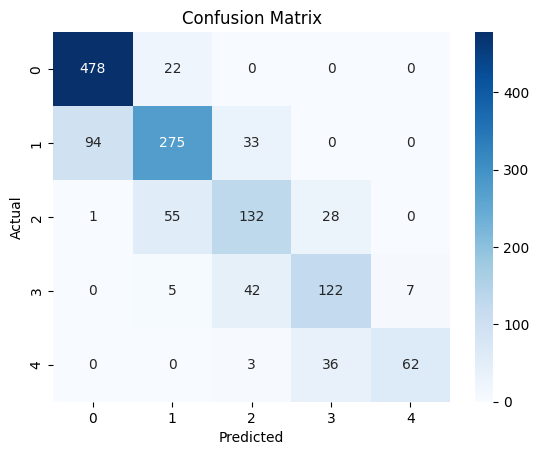

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import time
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Standardize the features
# # scaler = StandardScaler()
# # X_train_scaled = scaler.fit_transform(X_train)
# # X_test_scaled = scaler.transform(X_test)

# # Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# start_time = time.time() # Start timing

# # Apply SVM model
# svm_model = SVC(kernel='linear', C=1.0, random_state=42)
# kf = KFold(n_splits=10, shuffle=True, random_state=42)
# cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# # Train the svm model
# svm_model.fit(X_train_scaled, y_train)

# # Make predictions on the testing set
# y_pred = svm_model.predict(X_test_scaled)

# # Calculate runtime
# runtime = time.time() - start_time
# print("Runtime:", runtime, "seconds")

# # Evaluate the model
# print("Accuracy on the testing set:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

Runtime: 1.1847820281982422 seconds
Accuracy on the testing set: 0.7670250896057348
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.79      0.70      0.74        82
           2       0.64      0.47      0.54        45
           3       0.56      0.68      0.61        28
           4       0.84      0.76      0.80        21

    accuracy                           0.77       279
   macro avg       0.73      0.72      0.72       279
weighted avg       0.76      0.77      0.76       279



#### SVM without PCA

In [ ]:
import time

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

start_time = time.time() # Start timing

# Apply SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=kf, scoring='accuracy')

# Train the SVM model on the entire dataset
svm_model.fit(X_scaled, y)

# Calculate runtime
runtime = time.time() - start_time
print("Runtime:", runtime, "seconds")

y_pred = svm_model.predict(X_scaled)

print("Accuracy on the entire dataset:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))
# # Evaluate the model
# print("Cross-validation scores:", cv_scores)
# print("Mean cross-validation score:", cv_scores.mean())

Runtime: 0.776331901550293 seconds
Accuracy on the entire dataset: 0.8193548387096774
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       500
           1       0.82      0.77      0.79       402
           2       0.68      0.66      0.67       216
           3       0.74      0.74      0.74       176
           4       0.94      0.75      0.84       101

    accuracy                           0.82      1395
   macro avg       0.81      0.78      0.79      1395
weighted avg       0.82      0.82      0.82      1395



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the MAE and RMSE
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.18566308243727597
Root Mean Squared Error (RMSE): 0.4423787118874311


In [ ]:
# Calculate the accuracy
full_accuracy = accuracy_score(y, y_pred)

# Print the full accuracy
print("Full Accuracy of the Model:", full_accuracy)

Full Accuracy of the Model: 0.8193548387096774


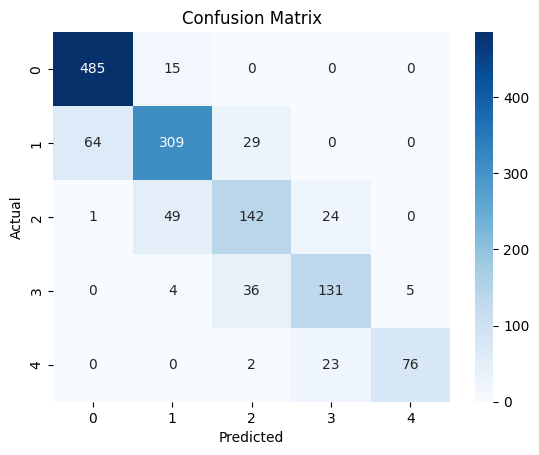

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Using hold-out method

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Create Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

# Start timing
start_time = time.time()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy', n_jobs=-1)

# Calculate runtime
runtime = time.time() - start_time
print("Runtime:", runtime, "seconds")

# Print cross-validation accuracy scores and mean accuracy
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Make predictions using cross-validation
y_pred = cross_val_predict(rf_classifier, X, y, cv=10, n_jobs=-1)

# Print classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Runtime: 4.384837627410889 seconds
Cross-Validation Accuracy Scores: [0.83571429 0.82142857 0.85714286 0.8        0.83571429 0.79136691
 0.83453237 0.76978417 0.78417266 0.8057554 ]
Mean Accuracy: 0.8135611510791367
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       500
           1       0.82      0.81      0.81       402
           2       0.66      0.67      0.67       216
           3       0.68      0.70      0.69       176
           4       0.88      0.69      0.77       101

    accuracy                           0.81      1395
   macro avg       0.79      0.76      0.77      1395
weighted avg       0.81      0.81      0.81      1395

Random Forest Confusion Matrix:
[[471  29   0   0   0]
 [ 43 326  33   0   0]
 [  1  39 145  31   0]
 [  0   5  38 123  10]
 [  0   0   3  28  70]]


Training SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best cross-validation score for SVM: 0.7912115631005766

Training DecisionTree...
Best parameters for DecisionTree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score for DecisionTree: 0.7553411274823831

Training KNN...
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for KNN: 0.6227658552210122

Accuracy of SVM on the test set: 0.7670250896057348
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       103
           1       0.79      0.70      0.74        82
           2       0.64      0.47      0.54        45
           3       0.56      0.68      0.61        28
           4       0.84      0.76      0.80        21

    accuracy                           0.77       279
   macro avg       0.73      0.72      0.72       279
wei

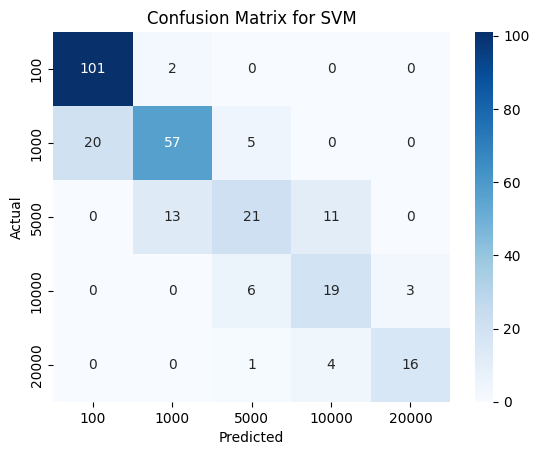

Accuracy of DecisionTree on the test set: 0.7240143369175627
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       103
           1       0.70      0.67      0.68        82
           2       0.56      0.51      0.53        45
           3       0.53      0.68      0.59        28
           4       0.82      0.67      0.74        21

    accuracy                           0.72       279
   macro avg       0.69      0.68      0.68       279
weighted avg       0.73      0.72      0.72       279



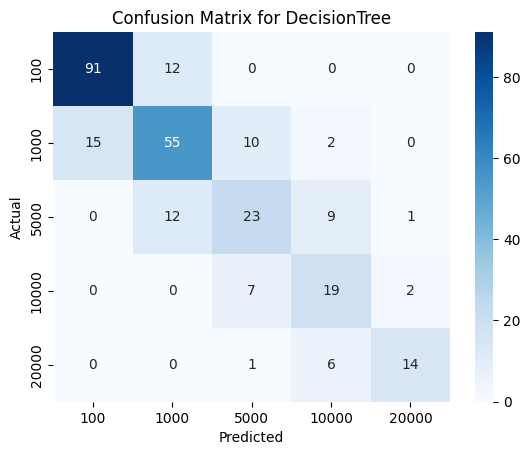

Accuracy of KNN on the test set: 0.6057347670250897
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       103
           1       0.50      0.62      0.55        82
           2       0.58      0.31      0.41        45
           3       0.61      0.61      0.61        28
           4       1.00      0.62      0.76        21

    accuracy                           0.61       279
   macro avg       0.67      0.58      0.60       279
weighted avg       0.62      0.61      0.60       279



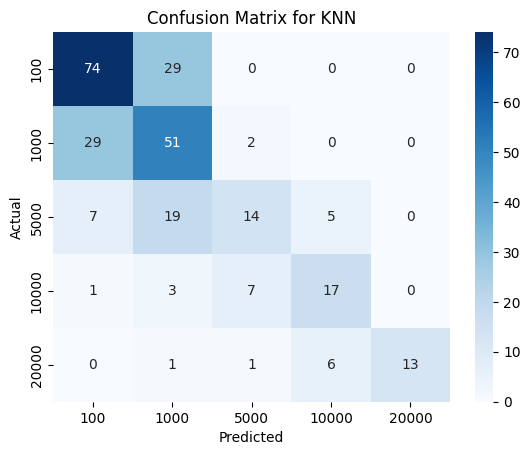

In [ ]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'SVM': SVC(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier()
    }

    param_grids = {
        'SVM': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
        'DecisionTree': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'KNN': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
    }

    best_models = {}

    for model_name in models:
        print(f"Training {model_name}...")
        grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {model_name}: {best_score}\n")
        best_models[model_name] = best_model

    # Evaluate the best models on the test set
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test)
        print(f"Accuracy of {model_name} on the test set: {accuracy_score(y_test, y_pred)}")
        print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

In [ ]:
train_and_evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Create Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

# Start timing
start_time = time.time()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy', n_jobs=-1)

# Calculate runtime
runtime = time.time() - start_time
print("Runtime:", runtime, "seconds")

# Print cross-validation accuracy scores and mean accuracy
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Make predictions using cross-validation
y_pred = cross_val_predict(rf_classifier, X, y, cv=10, n_jobs=-1)

# Print classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Runtime: 6.337472677230835 seconds
Cross-Validation Accuracy Scores: [0.83571429 0.82142857 0.85714286 0.8        0.83571429 0.79136691
 0.83453237 0.76978417 0.78417266 0.8057554 ]
Mean Accuracy: 0.8135611510791367
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       500
           1       0.82      0.81      0.81       402
           2       0.66      0.67      0.67       216
           3       0.68      0.70      0.69       176
           4       0.88      0.69      0.77       101

    accuracy                           0.81      1395
   macro avg       0.79      0.76      0.77      1395
weighted avg       0.81      0.81      0.81      1395

Random Forest Confusion Matrix:
[[471  29   0   0   0]
 [ 43 326  33   0   0]
 [  1  39 145  31   0]
 [  0   5  38 123  10]
 [  0   0   3  28  70]]


### Apply model without feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Random Forest classifier with best parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)
rf_classifier_best.fit(X, y)

# Make predictions
y_pred = rf_classifier_best.predict(X)

# Print classification report and confusion matrix
print("Random Forest Classification Report:")
print(classification_report(y, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       0.98      0.99      0.98       402
           2       0.98      0.96      0.97       216
           3       0.98      0.98      0.98       176
           4       1.00      0.99      1.00       101

    accuracy                           0.98      1395
   macro avg       0.99      0.98      0.98      1395
weighted avg       0.98      0.98      0.98      1395

Random Forest Confusion Matrix:
[[498   2   0   0   0]
 [  3 396   3   0   0]
 [  1   5 208   2   0]
 [  0   3   1 172   0]
 [  0   0   0   1 100]]


In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the trained SVM model to a file
joblib.dump(rf_classifier_best, 'models/RF_model.pkl')

['models/RF_model.pkl']

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Create Support Vector Machine classifier
svm_classifier = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],                    # Regularization parameter
    'kernel': ['linear', 'rbf'],          # Kernel function
    'gamma': ['scale', 'auto']            # Kernel coefficient (for 'rbf' kernel)
}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train SVM classifier with best parameters
svm_classifier_best = SVC(**best_params)
svm_classifier_best.fit(X, y)

# Make predictions
y_pred = svm_classifier_best.predict(X)

# Print classification report and confusion matrix
print("SVM Classification Report:")
print(classification_report(y, y_pred))
print("SVM Confusion Matrix:")
print(confusion_matrix(y, y_pred))

In [ ]:
import joblib

# Save the trained SVM model to a file
joblib.dump(svm_classifier_best, 'models/SVM_model.pkl')

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the best parameters
best_params = {
    'max_depth': 20,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 50
}

# Create the Random Forest classifier with the specified parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier_best, X, y, cv=10, scoring='accuracy')

# Print the cross-validation accuracy scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(rf_classifier_best, X, y, cv=10)

# Print classification report and confusion matrix
print("\nRandom Forest Classification Report (Cross-Validation):")
print(classification_report(y, y_pred_cv))
print("Random Forest Confusion Matrix (Cross-Validation):")
print(confusion_matrix(y, y_pred_cv))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-Validation Accuracy Scores: [0.83571429 0.82142857 0.85714286 0.8        0.83571429 0.79136691
 0.83453237 0.76978417 0.78417266 0.8057554 ]
Mean Cross-Validation Accuracy: 0.8135611510791367
Standard Deviation of Cross-Validation Accuracy: 0.026268046399537684


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


Random Forest Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       500
           1       0.82      0.81      0.81       402
           2       0.66      0.67      0.67       216
           3       0.68      0.70      0.69       176
           4       0.88      0.69      0.77       101

    accuracy                           0.81      1395
   macro avg       0.79      0.76      0.77      1395
weighted avg       0.81      0.81      0.81      1395

Random Forest Confusion Matrix (Cross-Validation):
[[471  29   0   0   0]
 [ 43 326  33   0   0]
 [  1  39 145  31   0]
 [  0   5  38 123  10]
 [  0   0   3  28  70]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
